A notebook for configuring the cameras of each channel of the Kameda Lab Orochi Simulator.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Overview

This notebook guides the user through connection to each of the channels of the OROCHI simulator, and gives prompts for recording the channel number, the centre-wavelength, full-width-at-half-maximum, f-number, and region-of-interest of sample area, associated with each channel camera system, indexed by serial number.

First we write a look-up-table of camera properties, and then we will attach the serial number of the associated camera to the camera properties.

The steps are:
1. Get list of serial numbers of devices connected.
For each device:
2. Begin live feed
3. Establish position of camera in rig (manual)
4. Prompt user to enter camera number
5. Assign serial number to camera number
6. Write look-up-table of properties of camera number, and add serial number
7. Automatically set region of interest
8. Check region of interest
9. Write region of interest to properties

# Camera Properties

There are 8 OROCHI channels, labelled 1 - 8, with band 8 as the monochromatic band.

| Band | CWL (nm) | FWHM (nm) | f# |
|------|----------|-----------|----|
| 1    | 400      | 50        |6.4 |
| 2    | 475      | 25        |6.4 |
| 3    | 550      | 25        |6.4 |
| 4    | 650      | 50        |6.4 |
| 5    | 725      | 50        |6.4 |
| 6    | 850      | 50        |6.2 |
| 7    | 950      | 50        |5.8 |
| 8    | 550      | 250       |6.4 |

These f-numbers are for the equivalent OROCHI FM channels, from the Kameda et al 2021 paper. I need to verify that the same are used for the simulator.
Note that these values are not currently used in the processing, but recorded in the metadata for future reference.

We store this information in a dictionary of dictionaries, labelled by band name, but we will replace these labels with the device name of each camera.

In [2]:
cameras = {
          'DMK 33GX249 23120778':
             {'number': 7,
              'serial': 23120778,
              'position': 1,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }, 
        'DMK 33GX249 10910265':
             {'number': 6,
              'serial': 10910265,
              'position': 2,
              'fnumber': 4.1, # updated to bring target exposure below 450 ms. 5.8 for OROCHI
              'flength': 12.5E-3,
              'cwl': 950.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910294':
             {'number': 3,
              'serial': 10910294,
              'fnumber': 4.4, # updated to bring target exposure below 450 ms. 6.4 for OROCHI
              'position': 3,
              'flength': 12.5E-3,
              'cwl': 400.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910291':
             {'number': 4,
              'serial': 10910291,
              'position': 4,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 725.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },  
        'DMK 33GX249 10910295':
             {'number': 5,
              'serial': 10910295,
              'position': 5,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 650.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },    
        'DMK 33GX249 10910289':
             {'number': 2,
              'serial': 10910289,
              'position': 6,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 550.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910273':
             {'number': 1,
              'serial': 10910273,
              'position': 7,
              'fnumber': 6.4,
              'flength': 12.5E-3,
              'cwl': 475.0,
              'fwhm': 25.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              },
        'DMK 33GX249 10910288':
             {'number': 0,
              'serial': 10910288,
              'position': 8,
              'fnumber': 6.2,
              'flength': 12.5E-3,
              'cwl': 850.0,
              'fwhm': 50.0,
              'width': 1920,
              'height': 1200,
              'roix': 0,
              'roiy': 0,
              'roiw': 1920,
              'roih': 1200
              }
       }


# Getting the list of available cameras

Here we connect to the available cameras, and get a list of their names.

In [4]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
connected_cameras = osc.connect_cameras(ic, cameras)
osc.configure_cameras(connected_cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 2 (DMK 33GX249 10910289) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
D

# Setting Region of Interest

The sample typically occupies only a small portion of the image, so it is useful to record this region of interest for future use.

We can do this by simply finding the brightest pixel after blurring, and centering a 128 x 128 window around this.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 330.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.11785758286714554
Exposure set to 0.11785700172185898 (err of 5.79633651229261e-07
Trial 1:
Imaging with Exposure: 0.11785700172185898 s
+Good exposure 0.11785700172185898 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.11785700172185898
Exposure Value set to 0.02239282988011837
Exposure set to 0.022391999140381813 (err of 8.311867713897692e-07
Trial 2:
Imaging with Exposure: 0.022391999140381813 s
+Good exposure 0.022391999140381813 Image recieved
Quantile: 3596.0, Target: 3889.2999999999997
Exposure current Value: 0.022391999140381813
Exposur

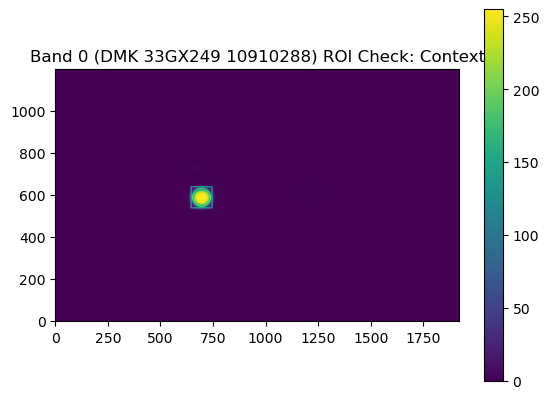

Imaging with Exposure: 0.02421800047159195 s
+Good exposure 0.02421800047159195 Image recieved


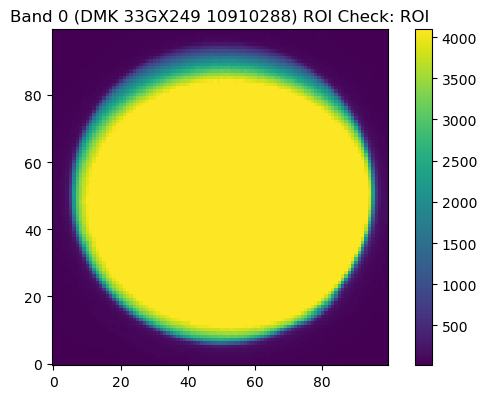

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 491.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.015842363238334656
Exposure set to 0.015842000022530556 (err of 3.632553995346066e-07
Trial 1:
Imaging with Exposure: 0.015842000022530556 s
+Good exposure 0.015842000022530556 Image recieved
Quantile: 3833.0, Target: 3889.2999999999997
Exposure current Value: 0.015842000022530556
Exposure Value set to 0.016074690967798233
Exposure set to 0.01607399992644787 (err of 6.910956309447158e-07
Trial 2:
Imaging with Exposure: 0.01607399992644787 s
+Good exposure 0.01607399992644787 Image recieved
Quantile: 3896.0, Target: 3889.2999999999997
Success afte

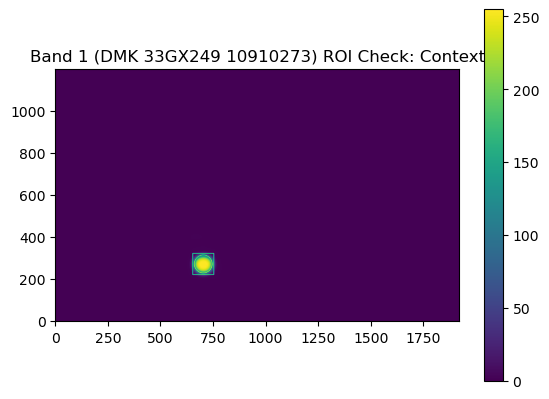

Imaging with Exposure: 0.01607399992644787 s
+Good exposure 0.01607399992644787 Image recieved


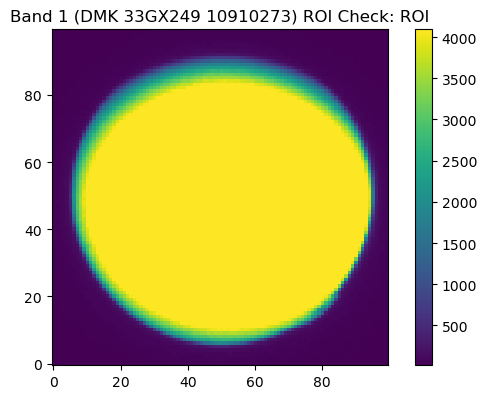

-----------------------------------
-----------------------------------
Device 2 (DMK 33GX249 10910289)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1749.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.004447455983608961
Exposure set to 0.004447000101208687 (err of 4.557989992460057e-07
Trial 1:
Imaging with Exposure: 0.004447000101208687 s
+Good exposure 0.004447000101208687 Image recieved
Quantile: 3828.0, Target: 3889.2999999999997
Exposure current Value: 0.004447000101208687
Exposure Value set to 0.0045182122848927975
Exposure set to 0.004517999943345785 (err of 2.1256805205795148e-07
Trial 2:
Imaging with Exposure: 0.004517999943345785 s
+Good exposure 0.004517999943345785 Image recieved
Quantile: 3905.0, Target: 3889.2999999999997
Succes

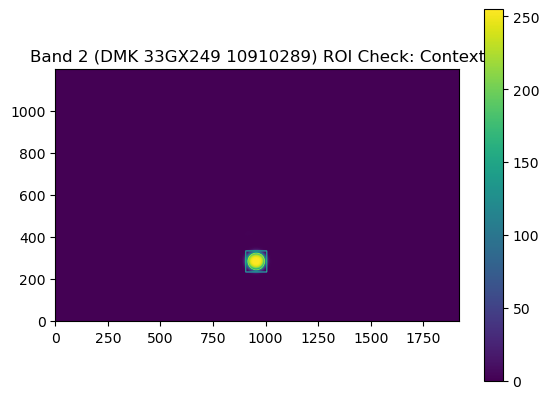

Imaging with Exposure: 0.004517999943345785 s
+Good exposure 0.004517999943345785 Image recieved


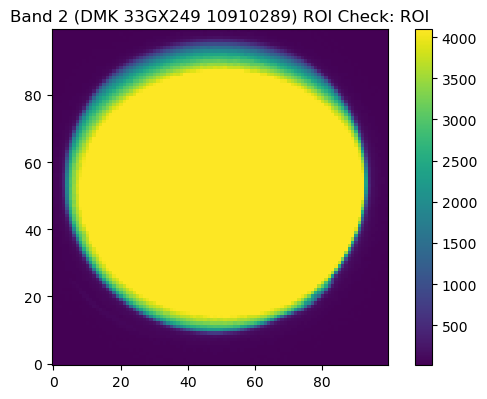

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 244.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.15939754247665405
Exposure set to 0.15939700603485107 (err of 5.425197324160358e-07
Trial 1:
Imaging with Exposure: 0.15939700603485107 s
+Good exposure 0.15939700603485107 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.15939700603485107
Exposure Value set to 0.030285431072115898
Exposure set to 0.030285000801086426 (err of 4.3034553527318553e-07
Trial 2:
Imaging with Exposure: 0.030285000801086426 s
+Good exposure 0.030285000801086426 Image recieved
Quantile: 3570.0, Target: 3889.2999999999997
Exposure curr

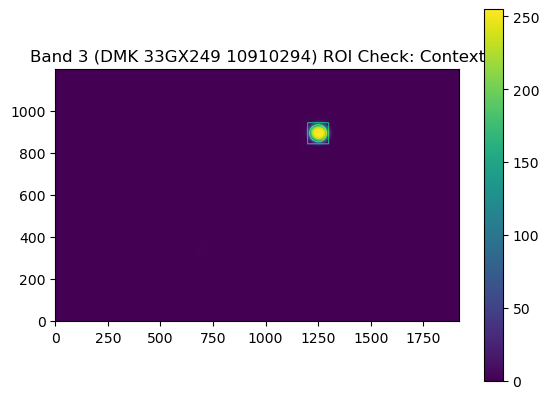

Imaging with Exposure: 0.032993000000715256 s
+Good exposure 0.032993000000715256 Image recieved


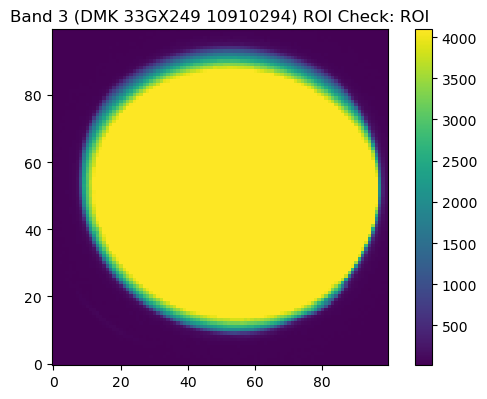

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 890.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.008740000426769257
Exposure set to 0.008740000426769257 (err of -1.1641531488804091e-11
Trial 1:
Imaging with Exposure: 0.008740000426769257 s
+Good exposure 0.008740000426769257 Image recieved
Quantile: 3836.0, Target: 3889.2999999999997
Exposure current Value: 0.008740000426769257
Exposure Value set to 0.008861440233886242
Exposure set to 0.008860999718308449 (err of 4.402347243120247e-07
Trial 2:
Imaging with Exposure: 0.008860999718308449 s
+Good exposure 0.008860999718308449 Image recieved
Quantile: 3890.0, Target: 3889.2999999999997
Success

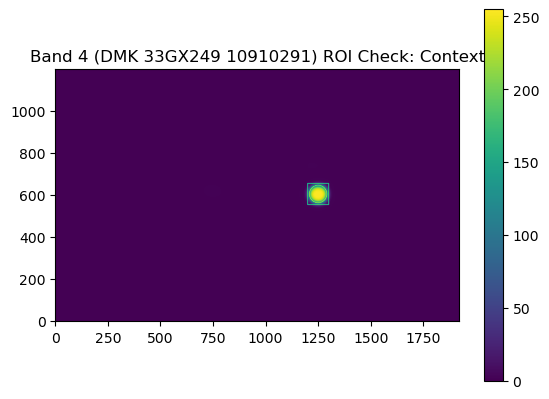

Imaging with Exposure: 0.008860999718308449 s
+Good exposure 0.008860999718308449 Image recieved


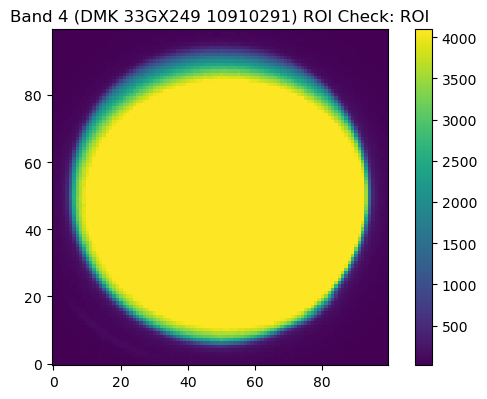

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 810.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009603210724890232
Exposure set to 0.009603000245988369 (err of 2.1008668283327425e-07
Trial 1:
Imaging with Exposure: 0.009603000245988369 s
+Good exposure 0.009603000245988369 Image recieved
Quantile: 3826.0, Target: 3889.2999999999997
Exposure current Value: 0.009603000245988369
Exposure Value set to 0.009761879220604897
Exposure set to 0.00976100005209446 (err of 8.788963432194291e-07
Trial 2:
Imaging with Exposure: 0.00976100005209446 s
+Good exposure 0.00976100005209446 Image recieved
Quantile: 3889.0, Target: 3889.2999999999997
Success aft

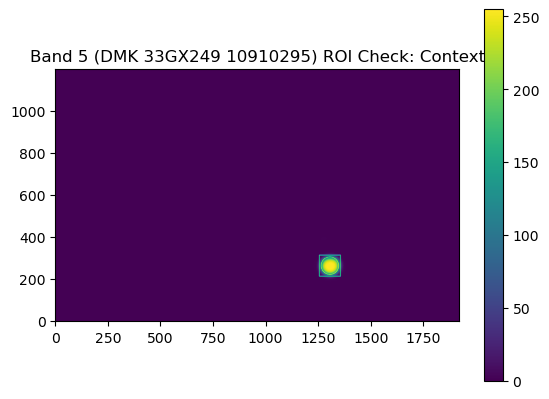

Imaging with Exposure: 0.00976100005209446 s
+Good exposure 0.00976100005209446 Image recieved


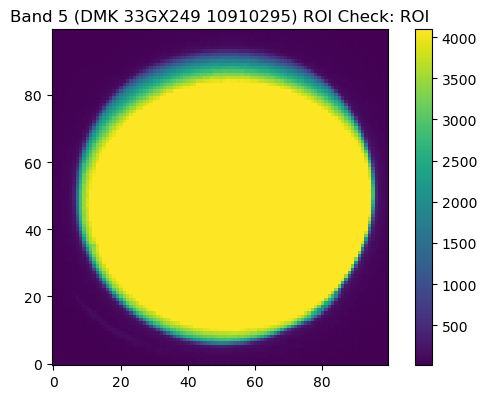

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1883.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.004130961373448372
Exposure set to 0.004129999782890081 (err of 9.616453965225272e-07
Trial 1:
Imaging with Exposure: 0.004129999782890081 s
+Good exposure 0.004129999782890081 Image recieved
Quantile: 3858.0, Target: 3889.2999999999997
Success after 1 trials
Exposure current Value: 0.004129999782890081
Imaging with Exposure: 0.004129999782890081 s
+Good exposure 0.004129999782890081 Image recieved
x: 840
y: 614


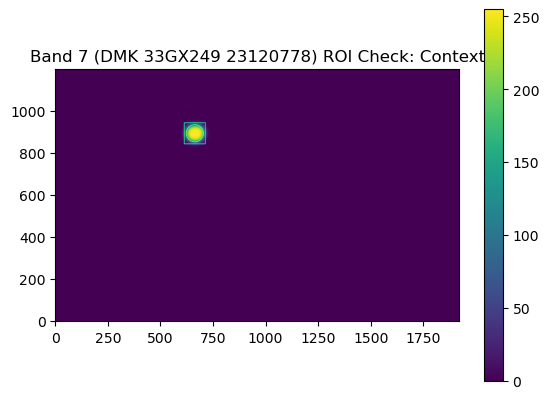

Imaging with Exposure: 0.004129999782890081 s
+Good exposure 0.004129999782890081 Image recieved


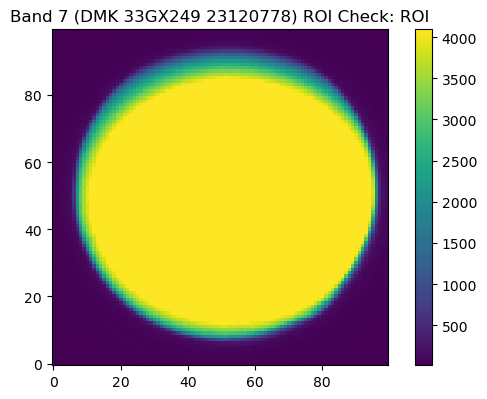

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 169.0, Target: 3889.2999999999997
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.23013611137866974
Exposure set to 0.23013600707054138 (err of 9.853489277289462e-08
Trial 1:
Imaging with Exposure: 0.23013600707054138 s
+Good exposure 0.23013600707054138 Image recieved
Quantile: 4094.0, Target: 3889.2999999999997
Exposure current Value: 0.23013600707054138
Exposure Value set to 0.043725840747356415
Exposure set to 0.04372499883174896 (err of 8.425116538937627e-07
Trial 2:
Imaging with Exposure: 0.04372499883174896 s
+Good exposure 0.04372499883174896 Image recieved
Quantile: 3527.0, Target: 3889.2999999999997
Exposure current 

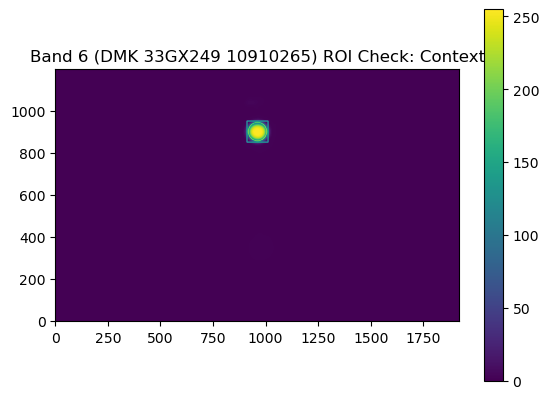

Imaging with Exposure: 0.04821600019931793 s
+Good exposure 0.04821600019931793 Image recieved


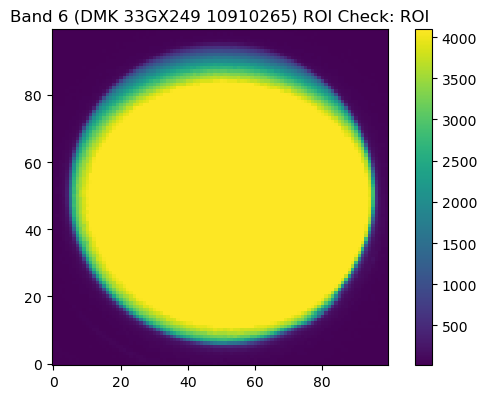

-----------------------------------


In [13]:
cameras = osc.find_camera_rois(connected_cameras, roi_size=100)

# Setting the F-Number

To set our cameras for the given f-numbers, we need to:
- set the lens ring f-number to the minimum of f/1.4
- establish all camera have same throughput at f/1.4
- get the exposure required to image the reflectance target to a given exposure (approx. 3700 DN) with high precision
- compute the exposure required to achieve the same level for the target f-number
- repeatedly adjust the ring until the value has been met.

In [ ]:
osc.check_f_numbers([connected_cameras[3]])

In [ ]:
osc.set_f_numbers([connected_cameras[3],connected_cameras[6]])

# Set Focus

In [ ]:
osc.set_focus(connected_cameras)